In [ ]:
import os

# Define the directory
directory = '/content/drive/MyDrive/eval_real_1000'

# Initialize an empty list to store the file paths
bonafide_audio_paths = []

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.wav'):
        # Construct the full file path and add it to the list
        file_path = os.path.join(directory, filename)
        bonafide_audio_paths.append(file_path)

# Print the list of file paths
print(bonafide_audio_paths[7])


/content/drive/MyDrive/eval_real_1000/real_20505.wav


In [ ]:
import os

# Define the directory
directory = '/content/drive/MyDrive/eval_fake_1000'

# Initialize an empty list to store the file paths
deepfake_audio_paths = []

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.wav'):
        # Construct the full file path and add it to the list
        file_path = os.path.join(directory, filename)
        deepfake_audio_paths.append(file_path)

# Print the list of file paths
print(deepfake_audio_paths[7])


/content/drive/MyDrive/eval_fake_1000/fake_20505.wav


In [ ]:
import librosa
import numpy as np

def extract_mfcc(audio_path, n_mfcc=13):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=None)  # Use the original sample rate
    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfccs.T, axis=0)  # Take the mean across time for a single feature vector


# Extract MFCCs for each audio sample
bonafide_mfccs = [extract_mfcc(path) for path in bonafide_audio_paths]
deepfake_mfccs = [extract_mfcc(path) for path in deepfake_audio_paths]

# Combine MFCCs from both sets
mfccs = bonafide_mfccs + deepfake_mfccs

# Create labels for each sample (1 for bonafide, 0 for deepfake)
labels = ['bonafide'] * len(bonafide_audio_paths) + ['deepfake'] * len(deepfake_audio_paths)


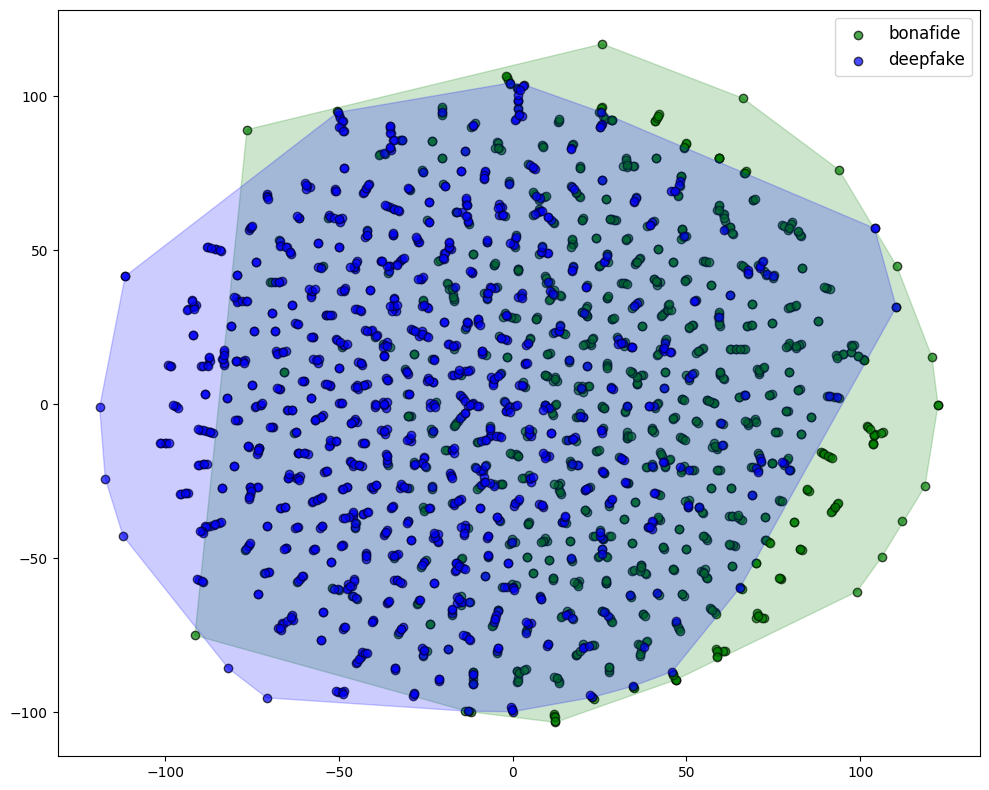

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

def plot_tsne_fantastic(mfccs, labels, sample_ids=None):
    # Convert list of MFCCs to NumPy array
    mfccs = np.array(mfccs)

    # Perform t-SNE
    tsne = TSNE(n_components=2, perplexity=1, random_state=42)  # Use smaller perplexity for small dataset
    reduced_features = tsne.fit_transform(mfccs)

    # Plot the results
    plt.figure(figsize=(10, 8), facecolor='white')  # Set the figure background to white
    plt.style.use('default')  # Use default style to ensure white background

    # Define colors and marker styles
    colors = {'bonafide': 'green', 'deepfake': 'blue'}
    markers = {'bonafide': 'o', 'deepfake': 'o'}

    ax = plt.gca()  # Get the current axes
    ax.set_facecolor('white')  # Set the axes background to white

    for label in np.unique(labels):
        indices = [i for i, x in enumerate(labels) if x == label]
        points = reduced_features[indices]

        # Scatter plot for points
        plt.scatter(points[:, 0], points[:, 1],
                    label=label,
                    color=colors[label],
                    marker=markers[label],
                    edgecolor='black',
                    alpha=0.7)

        # Draw convex hull around clusters
        if len(points) > 2:  # ConvexHull requires at least 3 points
            hull = ConvexHull(points)
            hull_points = points[hull.vertices]
            plt.fill(hull_points[:, 0], hull_points[:, 1], color=colors[label], alpha=0.2)

    # Add annotations if sample_ids are provided
    if sample_ids:
        for i, (x, y) in enumerate(reduced_features):
            plt.text(x, y, sample_ids[i], fontsize=8, alpha=0.6)

    # plt.title('t-SNE Visualization of MFCC Features for Bonafide and Fake Audio Samples', fontsize=16)
    plt.legend(loc='best', fontsize=12)
    # plt.xlabel('t-SNE Component 1', fontsize=12)
    # plt.ylabel('t-SNE Component 2', fontsize=12)
    plt.tight_layout()

    # Save the figure
    plt.savefig('fantastic_tsne_plot.png', dpi=300, facecolor='white')  # Ensure saved plot has a white background
    plt.show()

# Usage example:
# Assume mfccs is your MFCC feature list, labels are ['bonafide', 'deepfake'], and sample_ids is a list of IDs.
plot_tsne_fantastic(mfccs, labels, sample_ids=None)


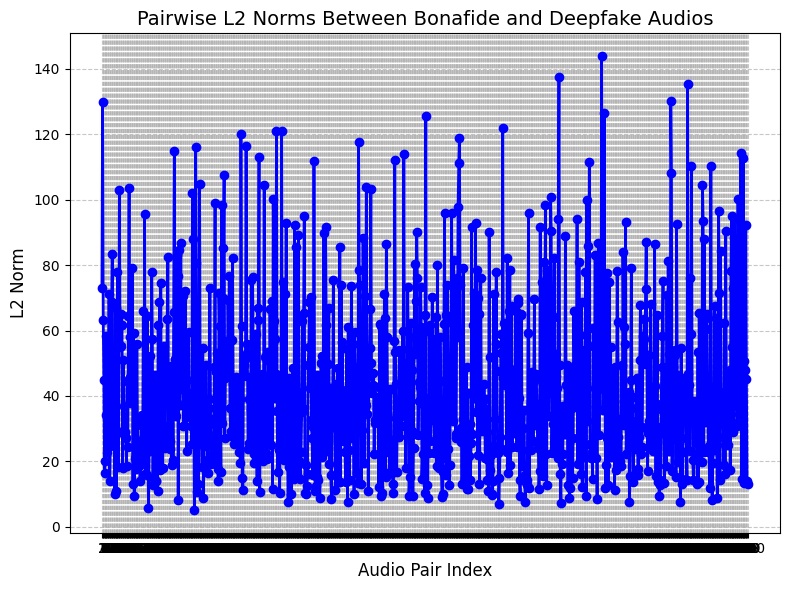

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_pairwise_l2_norm(bonafide_mfccs, deepfake_mfccs):
    """
    Calculate the L2 norm between each pair of bonafide and deepfake MFCCs.
    """
    pairwise_norms = []
    for i in range(len(bonafide_mfccs)):
        # Calculate L2 norm between bonafide and deepfake MFCC of the same index
        l2_norm = np.linalg.norm(bonafide_mfccs[i] - deepfake_mfccs[i])
        pairwise_norms.append(l2_norm)
    return pairwise_norms

def plot_pairwise_l2_norms_line(pairwise_norms):
    """
    Plot the pairwise L2 norms as a line chart.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(pairwise_norms) + 1), pairwise_norms, marker='o', color='blue', linestyle='-', linewidth=2)
    plt.title("Pairwise L2 Norms Between Bonafide and Deepfake Audios", fontsize=14)
    plt.xlabel("Audio Pair Index", fontsize=12)
    plt.ylabel("L2 Norm", fontsize=12)
    plt.xticks(range(1, len(pairwise_norms) + 1))
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example Data (replace with your actual MFCCs)
bonafide_mfccs_np = np.array(bonafide_mfccs)
deepfake_mfccs_np = np.array(deepfake_mfccs)

# Calculate pairwise L2 norms
pairwise_norms = calculate_pairwise_l2_norm(bonafide_mfccs_np, deepfake_mfccs_np)

# Plot the pairwise L2 norms as a line chart
plot_pairwise_l2_norms_line(pairwise_norms)
